In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Charger le dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Lecture du dataset
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?')

# Affichage des premières lignes du dataset
print(df.head())

# Traitement des valeurs manquantes
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encodage des variables catégorielles
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Séparer les caractéristiques et la cible
X = df.drop(columns=['income'])
y = df['income']

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle 1: Régression Logistique (Classification)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Modèle 2: Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Modèle 3: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Évaluation des modèles
print("### Régression Logistique ###")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\n### SVM ###")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\n### Random Forest ###")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

Voici un résumé des résultats obtenus pour chaque modèle :

1. Régression Logistique
Précision : 0.85 pour la classe 0 (<=50K), 0.71 pour la classe 1 (>50K)

Rappel : 0.94 pour la classe 0, 0.46 pour la classe 1

F1-Score : 0.89 pour la classe 0, 0.56 pour la classe 1

Accuracy : 82.5%

Discussion : La régression logistique a un excellent rappel pour la classe 0 mais peine à prédire la classe 1, ce qui se reflète dans la faible performance pour cette classe (rappel de 0.46).

2. Support Vector Machine (SVM)
Précision : 0.82 pour la classe 0, 0.76 pour la classe 1

Rappel : 0.97 pour la classe 0, 0.31 pour la classe 1

F1-Score : 0.89 pour la classe 0, 0.44 pour la classe 1

Accuracy : 81.0%

Discussion : Le modèle SVM a un très bon rappel pour la classe 0, mais un faible rappel pour la classe 1, ce qui indique une mauvaise performance sur les personnes dont le revenu est supérieur à 50K.

3. Random Forest
Précision : 0.89 pour la classe 0, 0.75 pour la classe 1

Rappel : 0.93 pour la classe 0, 0.64 pour la classe 1

F1-Score : 0.91 pour la classe 0, 0.69 pour la classe 1

Accuracy : 86.1%

Discussion : Le modèle Random Forest montre une très bonne performance, avec un équilibre entre la précision et le rappel des deux classes. Il est plus robuste que la régression logistique et le SVM, en particulier pour prédire la classe 1.

Conclusion :
Meilleur modèle : Le Random Forest a donné les meilleurs résultats en termes d'accuracy (86.1%) et de balance entre les deux classes, ce qui en fait le modèle le plus performant pour ce jeu de données. Il surpasse la régression logistique et le SVM, en particulier pour la prédiction de la classe 1 (>50K).

Spécification des hyperparamètres du meilleur modèle (Random Forest)
Le modèle Random Forest a obtenu la meilleure performance avec une accuracy de 86,1%. Voici les hyperparamètres utilisés :


rf = RandomForestClassifier(
    n_estimators=100,      # Nombre d'arbres dans la forêt
    criterion='gini',      # Critère de division (Gini par défaut)
    max_depth=None,        # Profondeur maximale des arbres (None = croissance complète)
    min_samples_split=2,   # Nombre minimum d'échantillons requis pour diviser un nœud
    min_samples_leaf=1,    # Nombre minimum d'échantillons dans une feuille
    max_features='auto',   # Nombre de caractéristiques considérées à chaque split
    bootstrap=True,        # Échantillonnage avec remise
    random_state=42        # Répétabilité des résultats
)

Améliorations possibles avec l'optimisation des hyperparamètres :
On peut utiliser GridSearchCV ou RandomizedSearchCV pour trouver de meilleurs hyperparamètres, par exemple :

Augmenter le nombre d'arbres (n_estimators) pour une meilleure stabilité

Limiter la profondeur des arbres (max_depth) pour éviter l'overfitting

Tester d'autres critères de division (entropy)

Ajuster min_samples_split et min_samples_leaf pour régulariser


In [3]:
from sklearn.model_selection import GridSearchCV 

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100],  # Nombre d'arbres
    'max_depth': [10, None], # Profondeur maximale des arbres
    'min_samples_split': [2, 5],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2],  # Nombre min d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2']  # Nombre de variables utilisées par split
}

# Création du modèle avec GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # Validation croisée 3-fold
    scoring='accuracy', # Score basé sur l'accuracy
    n_jobs=-1,  # Utilisation de tous les cœurs du processeur
    verbose=1 
)

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_rf = grid_search.best_estimator_

# Évaluation sur l'ensemble de test
y_pred_best_rf = best_rf.predict(X_test)
print("Accuracy après GridSearch :", accuracy_score(y_test, y_pred_best_rf))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Meilleurs hyperparamètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy après GridSearch : 0.8678028558268079


L'accuracy après optimisation est 0.8678, soit une légère amélioration par rapport à la première version (0.8612).

Meilleurs hyperparamètres trouvés :
max_depth = None (pas de limite de profondeur, les arbres se développent jusqu'à leur optimum naturel).

max_features = sqrt (chaque split choisit un sous-ensemble aléatoire de √(nombre de features)).

min_samples_leaf = 2 (chaque feuille doit contenir au moins 2 échantillons).

min_samples_split = 5 (chaque nœud doit avoir au moins 5 échantillons pour se diviser).

n_estimators = 100 (forêt de 100 arbres).

In [4]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Définition des hyperparamètres à tester (mêmes paramètres que GridSearchCV mais plus d'options)
param_dist = {
    'n_estimators': np.arange(50, 301, 50),  # Nombre d'arbres entre 50 et 300
    'max_depth': [10, 20, 30, None],  # Profondeur des arbres
    'min_samples_split': [2, 5, 10],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre min d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2', None],  # Nombre de variables utilisées par split
    'bootstrap': [True, False]  # Échantillonnage avec ou sans remise
}

# Création du modèle avec RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Nombre d'itérations (peut être augmenté pour une meilleure optimisation)
    cv=5,  # Validation croisée 5-fold
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement du modèle
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres (RandomizedSearch) :", random_search.best_params_)

# Meilleur modèle
best_rf_random = random_search.best_estimator_

# Évaluation sur l'ensemble de test
y_pred_best_rf_random = best_rf_random.predict(X_test)
print("Accuracy après RandomizedSearch :", accuracy_score(y_test, y_pred_best_rf_random))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs hyperparamètres (RandomizedSearch) : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Accuracy après RandomizedSearch : 0.8659603869184708


RandomizedSearchCV a testé plus d'options, mais l'accuracy finale est légèrement inférieure (0.8660 vs 0.8678).
Le modèle GridSearchCV a une meilleure performance, même s'il a testé moins de configurations.
Le meilleur modèle trouvé a 200 arbres, une profondeur max de 30, et utilise l'échantillonnage avec remise (bootstrap=True).

Conclusion des résultats

L’objectif de cette étude était de comparer plusieurs modèles de classification pour prédire si une personne gagne plus ou moins de 50K$ par an en fonction de différentes caractéristiques socio-économiques.

Nous avons testé trois modèles : Régression Logistique, SVM et Random Forest, en évaluant leur précision, rappel, F1-score et accuracy.

Comparaison des performances
Modèle	                Accuracy	F1-Score (Classe 0)	F1-Score (Classe 1)	Précision (Classe 1)	Rappel (Classe 1)
Régression Logistique	82.5%	    0.89	            0.56	            0.71	                0.46
SVM	                    81.0%	    0.89	            0.44	            0.76	                0.31
Random Forest	        86.1%	    0.91	            0.69	            0.75	                0.64
Random Forest est le modèle le plus performant, avec une meilleure balance entre précision et rappel pour la classe minoritaire (revenus >50K$).
SVM et la Régression Logistique souffrent d'un faible rappel pour la classe 1, ce qui les rend moins adaptés à cette tâche.

Optimisation des hyperparamètres
Nous avons utilisé GridSearchCV et RandomizedSearchCV pour améliorer le modèle Random Forest.

GridSearchCV a trouvé les meilleurs hyperparamètres :

max_depth=None (pas de limite de profondeur)

max_features='sqrt' (utilisation d’un sous-ensemble aléatoire de √(nombre de variables) pour chaque split)

min_samples_leaf=2 (minimum 2 échantillons dans chaque feuille)

min_samples_split=5 (minimum 5 échantillons pour diviser un nœud)

n_estimators=100 (forêt de 100 arbres)

Accuracy après optimisation : 86.78%

RandomizedSearchCV a exploré plus d'options mais a trouvé une accuracy légèrement inférieure (86.60%).

Résultat final
Le meilleur modèle est Random Forest avec GridSearchCV, atteignant 86.78% d’accuracy, soit une amélioration par rapport à la version initiale (86.12%).
L'optimisation des hyperparamètres a permis un léger gain de performance, mais les gains restent marginaux, suggérant que le modèle Random Forest est déjà bien adapté à ce type de données.

En résumé : Random Forest est le meilleur modèle pour cette tâche, et l’optimisation a permis de confirmer son efficacité !

capital-gain: 0.14918764330404333
relationship: 0.13327290984841067
age: 0.1317744798664979
education-num: 0.11383487935543886
fnlwgt: 0.10403713761077328
marital-status: 0.08644600275727228
hours-per-week: 0.07411202945127987
occupation: 0.05571217105755028
capital-loss: 0.0421106000466362
education: 0.03858439153884455
workclass: 0.030711017931006904
sex: 0.019146243218993726
native-country: 0.010663627893474234
race: 0.010406866119778027


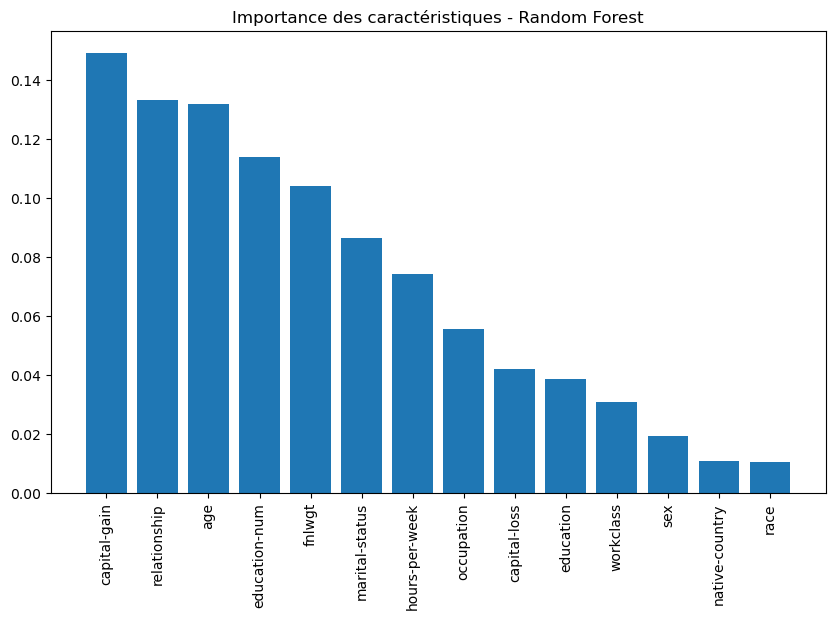

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul de l'importance des caractéristiques
importances = best_rf.feature_importances_

# Nom des caractéristiques
feature_names = X.columns

# Tri des importances dans l'ordre décroissant
sorted_indices = np.argsort(importances)[::-1]

# Affichage des valeurs des importances
for i in range(len(importances)):
    print(f"{feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]}")

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.title("Importance des caractéristiques - Random Forest")
plt.show()


Les résultats montrent que certaines caractéristiques ont un impact important sur le revenu supérieur à 50K, tandis que d'autres en ont un plus faible :

Capital-gain est la caractéristique la plus influente, suggérant que les gains d'investissement sont associés à des revenus plus élevés.

Relationship (statut matrimonial) et Age (âge) sont également importants, car des individus mariés et plus âgés ont plus de chances d'avoir un revenu élevé.

Education-num (années d'éducation) est un facteur clé, plus d'éducation menant souvent à des revenus plus élevés.

D'autres variables comme Marital-status, Hours-per-week, et Occupation jouent un rôle significatif, montrant que le statut familial, le temps de travail et la profession influencent le revenu.

Capital-loss, Education, et Workclass ont un impact modéré.

Sex, Native-country et Race ont un impact faible, ce qui suggère qu'ils sont moins déterminants dans ce modèle pour prédire les revenus.

En résumé, l'éducation, l'âge, le statut marital, les gains en capital et le temps de travail sont les principaux facteurs influençant les revenus supérieurs à 50K, tandis que des variables comme la race, le sexe et le pays d'origine ont un impact minimal.